# Study of Deep Learning Classifier with CIFAR-10 Dataset
This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) classifier using the open-source CIFAR-10 dataset.

In [ ]:
!pip install tensorflow matplotlib

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

C:\Users\HP OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.4477 - loss: 1.5181 - val_accuracy: 0.5415 - val_loss: 1.2811
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.5835 - loss: 1.1714 - val_accuracy: 0.5965 - val_loss: 1.1281
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6400 - loss: 1.0204 - val_accuracy: 0.6526 - val_loss: 0.9972
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.6755 - loss: 0.9185 - val_accuracy: 0.6604 - val_loss: 0.9715
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7010 - loss: 0.8500 - val_accuracy: 0.6727 - val_loss: 0.9197
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7225 - loss: 0.7900 - val_accuracy: 0.6771 - val_loss: 0.9365
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.7380 - loss: 0.7407 - val_accuracy: 0.6820 - val_loss: 0.9246
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7538 -

In [6]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 5s - 15ms/step - accuracy: 0.7134 - loss: 0.8623
Test accuracy: 0.7134000062942505


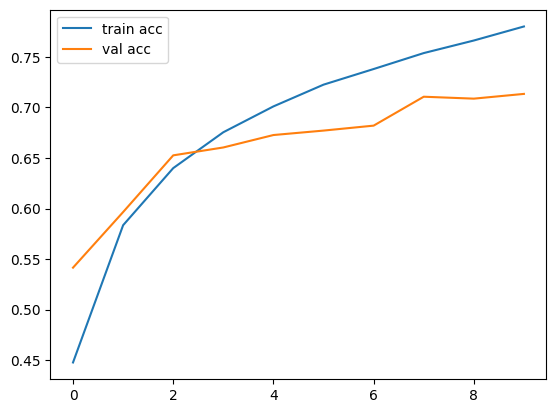

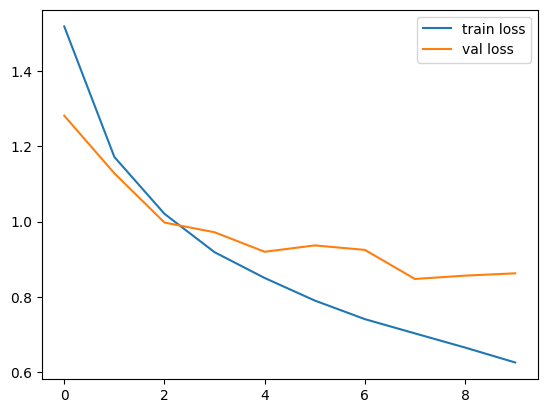

In [7]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Statistical Evaluation of Classifier
In this section, we evaluate the trained CNN classifier using statistical parameters such as **Precision, Recall, F1-score**, and a **Confusion Matrix**.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


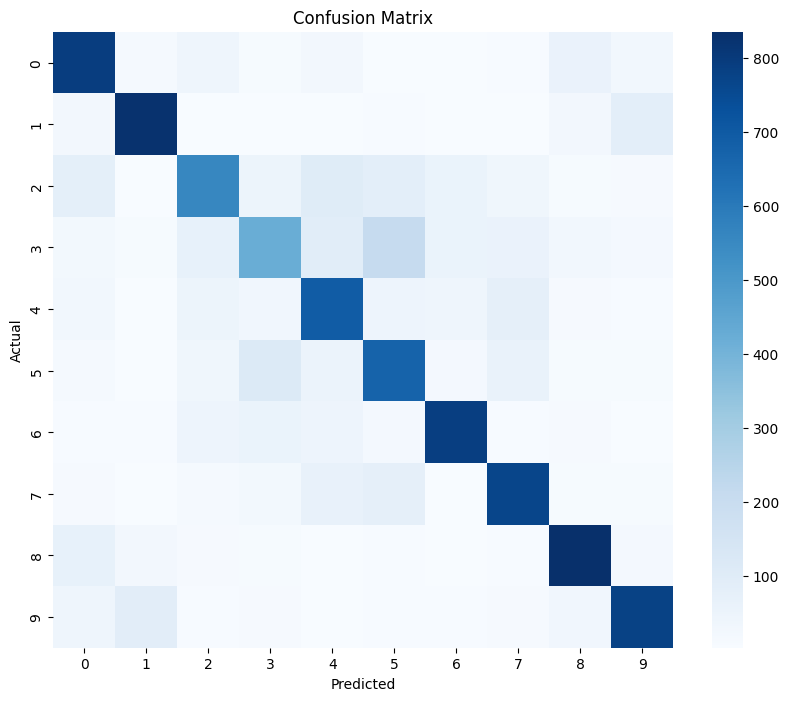

              precision    recall  f1-score   support

           0     0.7193    0.7920    0.7539      1000
           1     0.8280    0.8280    0.8280      1000
           2     0.6596    0.5580    0.6046      1000
           3     0.5707    0.4240    0.4865      1000
           4     0.6331    0.6920    0.6613      1000
           5     0.5850    0.6710    0.6251      1000
           6     0.7984    0.7880    0.7932      1000
           7     0.7305    0.7670    0.7483      1000
           8     0.7968    0.8350    0.8154      1000
           9     0.7909    0.7790    0.7849      1000

    accuracy                         0.7134     10000
   macro avg     0.7112    0.7134    0.7101     10000
weighted avg     0.7112    0.7134    0.7101     10000



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, digits=4))